# Анализ гипотез для увеличения выручки интернет-магазина

В этом проекте мы изучим 9 гипотез по увеличению выручки интернет-магазина, проанализируем данные A/B тестирования одной из гипотез и примем решение о прекращении или продолжении тестирования. Мы будем работать с двумя массивами данных, в одном из которых содержатся параметры для оценки эффективности гипотез, а в другом результаты A/B тестирования одной из гипотез. Наша работа будет проходить согласно следующему плану:

<a href='#1'>1. Приоритизация гипотез</a>

<a href='#1.1'>1.1 Предобработка данных</a>

<a href='#1.2'>1.2 Применение фреймворка ICE для приоритизации гипотез</a>

<a href='#1.3'>1.3 Применение фреймворка RICE для приоритизации гипотез</a>

<a href='#2'>2. Анализ A/B-теста</a>

<a href='#2.1'>2.1 Предобработка данных</a>

<a href='#2.2'>2.2 Изучение кумулятивных данных</a>

<a href='#2.3'>2.3 Анализ данных на вбросы</a>

<a href='#2.4'>2.4 Расчет статистической значимости</a>

<a href='#3'>3.Вывод и рекомендации</a>

<a id='1'></a> 
## 1. Приоритизация гипотез

<a id='1.1'></a> 
### 1.1 Предобработка данных

Загрузим данные и внимательно изучим основные параметры датасета `df`. Нам предоставлены 4 параметра по 9 гипотезам. Ошибок в данных не обнаружено, предобработка не нужна. Приведем только названия столбцов к нижнему регистру для удобства.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df = pd.read_csv('/datasets/hypothesis.csv')
display(df)
df.info()
df.columns = df.columns.str.lower()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


<a id='1.2'></a> 
### 1.2 Применение фреймворка ICE для приоритизации гипотез

Расчитаем метрику `ICE` для каждой гипотезы и добавим ее в наш датасет. Отсортируем гипотезы по убыванию `ICE`. Видим, что наиболее перспективными являются гипотезы номер `8`, `0` и `7`.

In [3]:
df['ICE'] = (df['impact'] * df['confidence']) / df['efforts']
pd.set_option('display.max_colwidth', 500)
display(df.sort_values(by='ICE', ascending=False))

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


<a id='1.2'></a> 
### 1.3 Применение фреймворка RICE для приоритизации гипотез

Расчитаем метрику `RICE` для каждой гипотезы и добавим ее в наш датасет. Отсортируем гипотезы по убыванию `RICE`. Видим, что наиболее перспективными являются гипотезы номер `7`, `2` и `0`.

In [4]:
df['RICE'] = (df['reach'] * df['impact'] * df['confidence']) / df['efforts']
pd.set_option('display.max_colwidth', 500)
display(df.sort_values(by='RICE', ascending=False))

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


Приоритизация гипотез меняется в зависимости от того, какая метрика выбрана. `ICE` и `RICE` отличаются наличием параметра `reach` или количества пользоватлей, которых затронет то или иное изменение. Поэтому, при оценке с использованием метрики `RICE` на первое место вышла гипотеза номер `8`, где мы добавляем новую форму на все основные страницы и увеличиваем количество пользователей, которые увидят это изменение. 

<a id='2'></a> 
## 2. Анализ A/B-теста

<a id='2.1'></a> 
### 2.1 Предобработка данных

Загрузим данные и изучим информацию о них. Заменим названия столбцов, где это необходимо, и приведем дату к правильному формату. Проверим датасеты на наличие дубликатов.

В датасете `orders` собраны данные о 1197 заказах пользователей, разделенных на группы A и B по дням.
В датасете `visitors` собраны данные о посещениях сайта за 62 дня в разбивке на группы A и B.

In [5]:
orders = pd.read_csv('/datasets/orders.csv')
display(orders.head())
orders = orders.rename(columns={'transactionId':'transaction_id', 'visitorId':'visitor_id'})
orders.info()
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
print('Количество дубликатов в датасете:', orders.duplicated().sum())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transaction_id    1197 non-null int64
visitor_id        1197 non-null int64
date              1197 non-null object
revenue           1197 non-null int64
group             1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
Количество дубликатов в датасете: 0


In [6]:
visitors = pd.read_csv('/datasets/visitors.csv')
display(visitors.head())
visitors.info()
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
print('Количество дубликатов в датасете:', visitors.duplicated().sum())

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
Количество дубликатов в датасете: 0


<a id='2.2'></a> 
### 2.2 Изучение кумулятивных данных

Построим график кумулятивной выручки по группам. 

Кумулятивная выручка группы А равномерно увеличивается со временем и бОльшую часть наблюдаемого периода больше кумулятивной выручки группы B. В группе B есть резкие скачки, что может быть сигналом наличия аномальных значений в данных. Это может быть вызвано как увеличение суммы заказов (среднего чека) или увеличением количества заказов. 

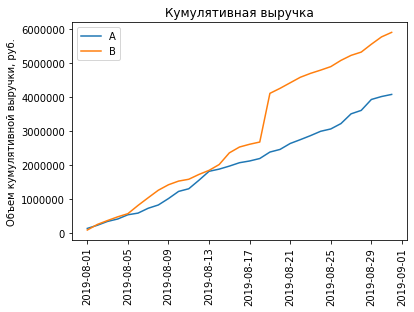

In [7]:
#создадим пары значений с датами проведения теста и группами теста
datesGroups = orders[['date','group']].drop_duplicates() 

#создадим датасет с кумулятивными данными по заказам по группам
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : pd.Series.nunique, 'visitor_id' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

#сделаем срезы данных по группам
cumulativeRevenueA = ordersAggregated[ordersAggregated['group']=='A'][['date','revenue']]
cumulativeRevenueB = ordersAggregated[ordersAggregated['group']=='B'][['date','revenue']]

#построим графики
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation=90)
plt.title('Кумулятивная выручка')
plt.ylabel('Объем кумулятивной выручки, руб.')
plt.legend() 

Расчитаем и построим график кумулятивного среднего чека по группам

Кумулятивный средний чек в группе А и В сильно колеблется. Особенно это заметно в группе В, что подтверждает наше предположение о наличии вбросов. Также мы видим резкое увеличение среднего чека в группе В в тот же временной период, что и увеличивалась выручка в группе В на прошлом графике. Соответственно, можно сделать вывод о наличии заказов с аномально больгим средним чеком в группе В.

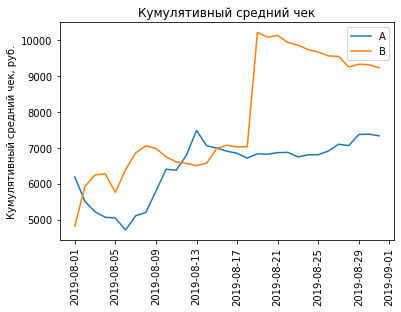

In [8]:
#создадим датасет с кумулятивными данными по визитам по группам
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

#объединим с датасетом с кумулятивными данными по выручке
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'transactions', 'buyers', 'revenue', 'visitors']

#расчитаем кумулятивный средний чек
cumulativeData['average_bill'] = cumulativeData['revenue'] / cumulativeData['transactions']

#сделаем срезы данных по группам
cumulativeDataA = cumulativeData[cumulativeData['group']=='A'][['date','average_bill']]
cumulativeDataB = cumulativeData[cumulativeData['group']=='B'][['date','average_bill']]

#построим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['average_bill'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['average_bill'], label='B')
plt.xticks(rotation=90)
plt.title('Кумулятивный средний чек')
plt.ylabel('Кумулятивный средний чек, руб.')
plt.legend() 

Построим также графики отношения кумулятивных средних чеков.

Подтверждаем вывод о том, что кумулятивный средний чек в группе В выше, чем в группе А бОльшую часть периода наблюдений. Видим разкий спад на графике, которые обозначает увеличение среднего чека в группе А в период с 9 по 17 августа.

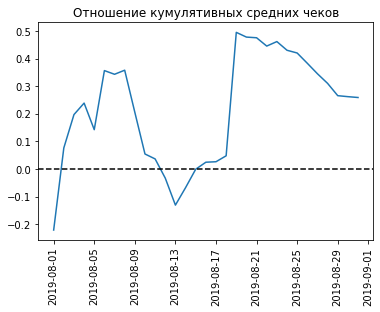

In [9]:
#объединим данные по двум группам
mergedCumulativeData = cumulativeDataA.merge(cumulativeDataB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

#построим графики

plt.plot(mergedCumulativeData['date'], (mergedCumulativeData['average_billB'])/(mergedCumulativeData['average_billA'])-1)
plt.xticks(rotation=90)
plt.title('Отношение кумулятивных средних чеков')
plt.axhline(y=0, color='black', linestyle='--') 

Расчитаем и построим график кумулятивной конверсии по группам

Видим, что после пятого августа 2019 г. кумулятивная конверсия в группе B значительно выше, чем в группе А. В течение наблюдаемого периода в обеих группах наблюдаются резкие скачки значений. 

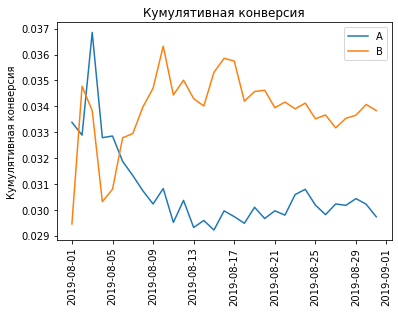

In [10]:
#расчитаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['transactions'] / cumulativeData['visitors']

#сделаем срезы данных по группам
cumulativeDataA = cumulativeData[cumulativeData['group']=='A'][['date','conversion']]
cumulativeDataB = cumulativeData[cumulativeData['group']=='B'][['date','conversion']]

#построим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xticks(rotation=90)
plt.title('Кумулятивная конверсия')
plt.ylabel('Кумулятивная конверсия')
plt.legend() 

Расчитаем и построим график относительного изменения кумулятивной конверсии группы B к группе A

Видим, что кумулятивная конверсия группы В больше, чем в группе А после пятого августа 2019 г., как мы и наблюдали на графике абсолюного значения конверсий. В конце теста отношение конверсий колеблется в диспазоне от 0.1 до 0.15.

Text(0.5, 1.0, 'Относительное изменение конверсии группы B относительно группы A')

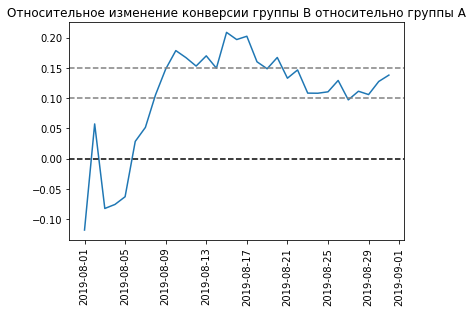

In [11]:
#объединим датасеты с конверсиями по группам
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

#расчитаем относительное изменение кумулятивной конверсии группы B к группе A
mergedCumulativeConversions['change'] = (mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']) -1

#построим график
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['change'])
plt.xticks(rotation=90)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.title('Относительное изменение конверсии группы B относительно группы A')

<a id='2.3'></a> 
### 2.3 Анализ данных на вбросы

Вычислим количество заказов по пользователям и построим точечный график

В наших данных есть пользователи, которые совершали по 11 покупок, при этом, из графика мы видим, что большая часть посетителей совершила от 1 до 3х покупок. Чтобы определить границу для отсечения аномальных значений, найдем 95-й и 99-й перцентили. Не более 5% покупателей совершили больше чем 2 заказа. И только 1% пользователей заказывали более четырех раз. Следовательно, мы можем выбрать значение, равное 4м заказам в качестве границы аномальности.

,visitor_id,transactions
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


95-й и 99-й перцентили количества заказов по пользователям: [2. 4.]


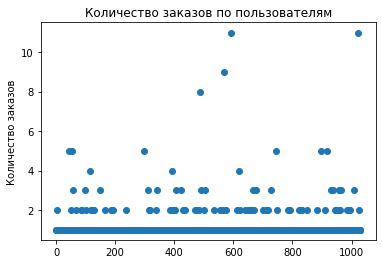

In [12]:
#сгруппируем необходимые нам параметры по пользователям
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsers.columns = ['visitor_id','transactions']

display(ordersByUsers.sort_values(by='transactions', ascending=False).head(10))

#построим график
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['transactions'])
plt.title('Количество заказов по пользователям')
plt.ylabel('Количество заказов')

#посчитаем перцентили
print('95-й и 99-й перцентили количества заказов по пользователям:', np.percentile(ordersByUsers['transactions'], [95, 99]))
order_n_threshold = np.percentile(ordersByUsers['transactions'], [95, 99])[1]

Далее рассмотрим распределение стоимости заказов

По таблице и графику видим, что большинство заказов было совершено на сумму меньше 100 000 руб. Однако у нас есть два значения, которые значительно больше и точно являются аномалиями. Так как эти два значения детериорируют масштаб нашего графика, то построим еще один график с ограничением в 100 000 р. по оси y и оценим распределение стоимости заказов с помощью перцентилей.


Только 1% пользователей сделал заказ на сумму, большую, чем 58233.2 рубля. Следовательно, мы можем выбрать это значение в качестве границы аномальности.

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


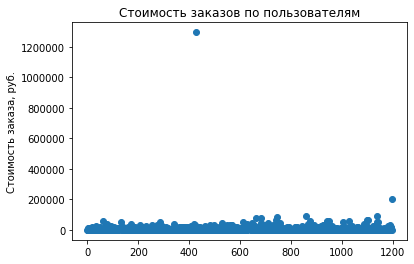

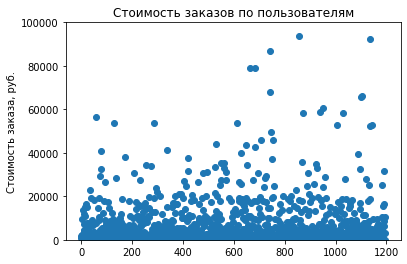

95-й и 99-й перцентили стоимости по пользователям: [28000.  58233.2]


In [13]:
#отсортируем данные по стоимости заказов
display(orders.sort_values(by='revenue', ascending=False).head(10))

#построим график
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('Стоимость заказов по пользователям')
plt.ylabel('Стоимость заказа, руб.')
plt.show()

#построим второй график
plt.scatter(x_values, orders['revenue']) 
plt.title('Стоимость заказов по пользователям')
plt.ylabel('Стоимость заказа, руб.')
plt.ylim(0, 100000)
plt.show()

#посчитаем перцентили
print('95-й и 99-й перцентили стоимости по пользователям:', np.percentile(orders['revenue'], [95, 99]))
order_revenue_threshold = np.percentile(orders['revenue'], [95, 99])[1]

<a id='2.4'></a> 
### 2.4 Расчет статистической значимости

<b>Расчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.</b>

Нулевая гипотеза: статистически значимых различий в конверсии между группами нет.

Альтернативная гипотеза: между группами есть статистически значимые различия в конверсиях.

По результатам статистического теста по критерию Манна-Уитни, p-value меньше критического уровня в 5%. Это означает, что мы можем отвергнуть нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет. Это подтверждает и относительная разница средней конверсии выборок.

In [14]:
#подготовим данные для анализа
#подсчитаем кумулятивное количество посетителей в группах А и В
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

#подсчитаем кумулятивную выручку в группах А и В
ordersADaily = orders[orders['group']=='A'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

#объединим полученные данные
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')


In [15]:
#сгруппируем данные по группам и по количеству заказов на каждого пользователя
ordersByUsersA = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders'] 

#подготовим выборки
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))
print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 


0.017
0.138


<b>Расчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.</b>

Нулевая гипотеза: статистически значимых различий в среднем чеке заказа между группами нет.

Альтернативная гипотеза: между группами есть статистически значимые различия в средних чеках.

По результатам статистического теста по критерию Манна-Уитни, p-value больше критического уровня в 5%. Это означает, что мы не можем отвергнуть нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет. Однако кредний чек в группе В на 25.9% выше, чем в группе А.

In [16]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative = 'two-sided')[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.729
0.259


<b>Расчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.</b>

В наших данных 15 покупателей со значениями, которые могут повлиять на результаты наших тестов. Уберем эти данные и проведем статистичсекие тесты.

Нулевая гипотеза: статистически значимых различий в конверсии между группами нет.

Альтернативная гипотеза: между группами есть статистически значимые различия в конверсиях.

По результатам статистического теста по критерию Манна-Уитни, p-value меньше критического уровня в 5%. Это означает, что мы можем отвергнуть нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет. Результаты схожи для "сырых" и для "очищенных" данных.

In [17]:
#найдем аномалии в данных
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > order_n_threshold]['userId'], ordersByUsersB[ordersByUsersB['orders'] > order_n_threshold]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > order_revenue_threshold]['visitor_id']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.shape)

#отфильтруем данные
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 

#проведем статистический тест
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1], alternative = 'two-sided'))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

(15,)
0.007
0.153


<b>Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.</b>

Нулевая гипотеза: статистически значимых различий в среднем чеке заказа между группами нет.

Альтернативная гипотеза: между группами есть статистически значимые различия в средних чеках.


По результатам статистического теста по критерию Манна-Уитни, p-value больше критического уровня в 5%. Это означает, что мы не можем отвергнуть нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет. Средний чек по "очищенным данным" ниже в группе В, чем в группе А. Это означает, что сильные колебания на графике относительного изменения кумулятивного изменения среднего чека были вызваны аномальными значениями среднего чека, то есть заказами на большую сумму.

In [18]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'])[1], alternative = 'two-sided'))


print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

0.425
-0.006


<a id='3'></a> 
## 3.Вывод и рекомендации

По результатам тестов мы можем сделать вывод о том, что статистически значимых различий в среднем чеке между двумя группами нет ни в "сырых" ни в "отфильтрованных" данных. Отклонения в "сырых" данных были вызваны вбросами, которые мы удалили с помощью отсечения 99% заказов со слишком большим средним чеком. 

При этом есть статистически значимые различия в конверсиях. По графикам кумулятивных значений мы видим, что группа В "лучше" группы А. 

Исходя из имеющихся результатов, можно сказать, что в группе В лучше конверсия, но при этом средний чек не обязательно выше, чем в группе А. Тестирование можно остановить и сделать вывод о том, что выбранная гипотеза увеличивает конверсию для пользователей группы В. Хотя это и не приводит к увеличению среднего чека, но мы видим, что кумулятивная выручка от группы В превосходит выручку от группы А. 